In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./dataset/fuel_ferc1.csv")

In [3]:
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [4]:
#descriptive statistics of numerical features
df.describe() 

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [5]:
#Descriptive statistics of categorical features
df.describe(include=[np.object, pd.Categorical])

,record_id,plant_name_ferc1,fuel_type_code_pudl,fuel_unit
count,29523,29523,29523,29343
unique,29523,2315,6,9
top,f1_fuel_2002_12_194_3_12,big stone,gas,mcf
freq,1,156,11486,11354


In [6]:
df.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

#### Question 3: Lowest average fuel cost per unit burned

In [7]:
# lowest average fuel cost per unit burned?
df.groupby(['fuel_type_code_pudl'])['fuel_cost_per_unit_burned'].mean().sort_values()

fuel_type_code_pudl
gas          13.659397
other        18.253856
waste        19.518122
coal         67.421830
oil         168.877086
nuclear    4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64

#### Question 4: Standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?

In [8]:
np.round(df['fuel_mmbtu_per_unit'].describe(),2)

count    29523.00
mean         8.49
std         10.60
min          0.00
25%          1.02
50%          5.76
75%         17.01
max        341.26
Name: fuel_mmbtu_per_unit, dtype: float64

#### Question 5: Skewness and kurtosis for the fuel quantity burned in two decimal places?

In [9]:
feature = ['fuel_qty_burned']
skewness = np.round(df['fuel_qty_burned'].skew(),2)
kurtosis = np.round(df['fuel_qty_burned'].kurtosis(),2)
print('Skewness is:', skewness, 'and Kurtosis is:', kurtosis)

Skewness is: 15.85 and Kurtosis is: 651.37


#### Question 6: Feature having missing values, total and percentage of missing values as a factor of the number of rows

In [10]:
#feature with missing values
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

,Total,Percent
fuel_unit,180,0.61
fuel_cost_per_mmbtu,0,0.00
fuel_cost_per_unit_delivered,0,0.00
fuel_cost_per_unit_burned,0,0.00
fuel_mmbtu_per_unit,0,0.00


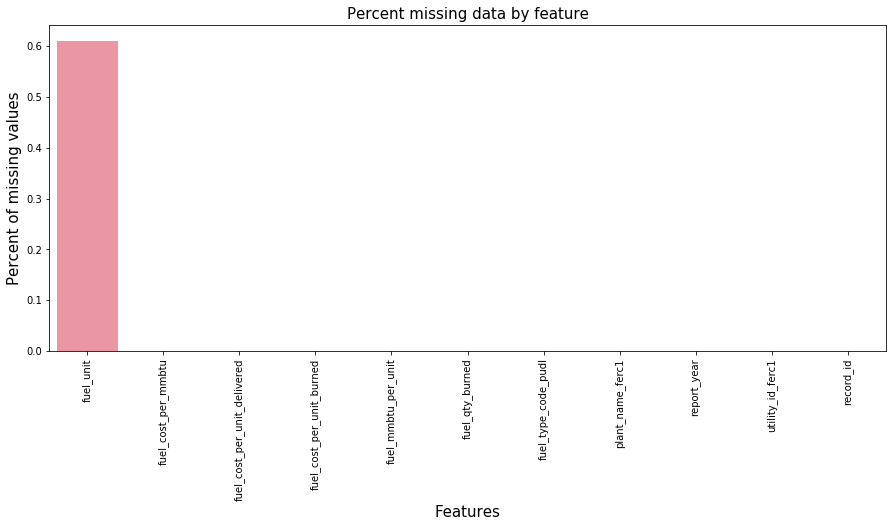

In [12]:
#percentage of missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = np.round(((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False),3)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

#### Question 7: Imputation of categorical missing values with the mode of the feature

In [13]:
df['fuel_unit'].fillna(df['fuel_unit'].mode()[0], inplace=True)

In [14]:
df.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

#### Question 8: Features having the second and third lowest correlation with the fuel_cost_perunit_burned

In [15]:
df.corr()['fuel_cost_per_unit_burned'].sort_values()

utility_id_ferc1               -0.037863
fuel_qty_burned                -0.018535
fuel_mmbtu_per_unit            -0.010034
fuel_cost_per_mmbtu            -0.000437
fuel_cost_per_unit_delivered    0.011007
report_year                     0.013599
fuel_cost_per_unit_burned       1.000000
Name: fuel_cost_per_unit_burned, dtype: float64

#### Question 9: Percentage change in fuel cost per unit burned in 1998 compared to 1994

In [16]:
#Question 9
yearly_fuel_cost_per_unit_burned = df.groupby(['fuel_type_code_pudl','report_year'])['fuel_cost_per_unit_burned'].sum()
print(yearly_fuel_cost_per_unit_burned)
percentage_change = round(((11902.597-14984.572)/14984)*100,0)
print(percentage_change)

fuel_type_code_pudl  report_year
coal                 1994           14984.572
                     1995           14571.785
                     1996           12694.803
                     1997           43742.178
                     1998           11902.597
                                      ...    
waste                2014             591.594
                     2015             629.270
                     2016             539.079
                     2017             452.079
                     2018             660.972
Name: fuel_cost_per_unit_burned, Length: 148, dtype: float64
-21.0


#### Question 10: Year having highest average fuel_cost_per_unit_delivered

In [17]:
df.groupby(['report_year'])['fuel_cost_per_unit_delivered'].mean().sort_values()

report_year
1999       25.551627
1995       32.735269
2006       38.657484
2005       41.438184
2007       43.325023
2017       46.196861
2002       47.594361
2003       55.663493
2008       58.588197
2011       59.774667
2001       60.050396
2012       60.994502
1994       63.636060
2010       91.862105
2016      103.901761
2004      139.524275
2013      172.307591
2014      192.737183
1998      287.154420
2015      326.535511
2018      499.269966
2009      652.694163
2000      985.362877
1996     9196.705948
1997    11140.197239
Name: fuel_cost_per_unit_delivered, dtype: float64